In [1]:
#Import data preprocessing modules
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# Visualization modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Machine learning module
import sklearn

In [5]:
#Read the file
dataset = pd.read_csv("./input/titanic.csv")

#Show the first 50 rows
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#Observe the data shape
dataset.shape

(891, 12)

In [13]:
#Observe the data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        824 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [109]:
#Set seaborn as the default drawing library
sns.set()

In [18]:
def bar_chart(feature):
    Survived = dataset[dataset["Survived"] ==1 ][feature].value_counts()
    Dead = dataset[dataset["Survived"] ==0 ][feature].value_counts()
    df = pd.DataFrame([Survived,Dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

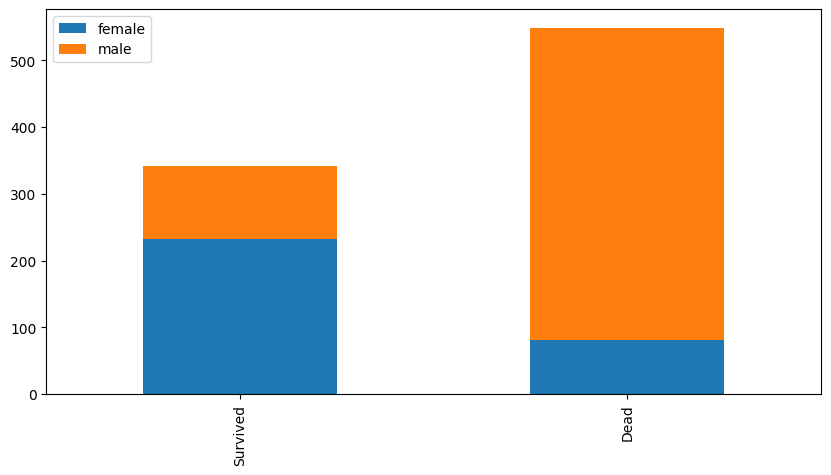

In [19]:
#Bar Chat of Survival/Dead Men and Women
bar_chart("Sex")

In [ ]:
#Bar Chat of the Cabin of the Survival/Dead Person
bar_chart("Cabin")

In [7]:
#Calculate the number of “NaN” in the columns 
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [ ]:
#Observe the Name column
#Write the code

In [8]:
#Pick out Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [9]:
#Count the Number of People by Each Title
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [10]:
#titlemapping
title_mapping = {"Mr": 0,"Miss": 1,"Mrs":2}
dataset['Title'] = dataset['Title'].map(title_mapping)

In [11]:
#Current dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
#Current dataframe
dataset.head()

In [ ]:
#Show the Distribution of Title/Survival and Dead
#Write the code

In [117]:
#Delete the "Name" column
#Write the code

In [ ]:
#Current dataframe
dataset.head()

# Sex

In [118]:
#mapping sex
#Write the code
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
bar_chart('Sex')

In [ ]:
#Current dataframe
dataset.head(100)

# Age

In [ ]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
#Write the code
dataset["Age"]

In [ ]:
#Distribution of Age/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [122]:
#Mapping Function According to the Range of Age 
#Write the code

In [ ]:
#Current dataframe
dataset.head()

In [ ]:
#Bar Chart of Age
#Write the code

# Embarked (登船地點)

In [ ]:
#Analyze the Type of Boarding Tickets at Each Boarding Location
#Write the code
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
#Fill Missing Value for Embarked Location
#Write the code
dataset.head(100)

In [ ]:
#Mapping Function for the Embarked Location
#Write the code
dataset.head(100)

# Fare(票價)

In [ ]:
#Fill in Missing Value for Fares 
#Write the code
dataset.head(50)

In [ ]:
#Distribution of Fare/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
#Mapping Function According to the Range of Fare
#Write the code

In [ ]:
#Current dataframe
dataset.head()

In [ ]:
#Observe the Cabin Number
#Write the code

In [ ]:
#Observe the Cabin Number =>Take out the first letter
#Write the code

In [ ]:
#Analyze the Number of People in Various Ticket Types and Cabin Types
#Write the code
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [139]:
#Cabin Mapping
#Write the code

In [ ]:
#Fill in the Missing Value on the Type of Cabin
#Write the code

In [ ]:
#Current dataframe
dataset.head()

# Sibsp & Parch

In [142]:
#Combine Sibsp & Parch
#Write the code

In [ ]:
#Distribution of Family Population/Survival and Death
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
#The Mapping Function of Family Population 
#Write the code

In [ ]:
#Current dataframe
dataset.head()

# Data Cleaning (資料清洗)

In [146]:
#Delete Sibsp, Parch, Ticket
#Write the code

In [ ]:
#Set Target Variables and Explanatory Variables
#Write the code
dataset_data.shape, dataset_target.shape

In [ ]:
#All explanatory variables
dataset_data.head()

In [ ]:
#Check the types of every column in the training data.
#They should be numeric type.
#Write the code

# Build the model-DNN

In [168]:
#Install Keras and Sklearn
#Write the code
from sklearn import preprocessing

In [ ]:
#Create Model Function
def build_model():
#Write the code

In [ ]:
#Create a Drawing Function
def show_train_history(train_history,train,validation,label):
    #Write the code
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [171]:
#Feature Normalization
#Write the code

In [ ]:
#Train Model
#Write the code


#Evaluate training result
#Write the code
print ('\nTrain Acc:', score[1])

In [ ]:
#Show Training Process
#Write the code

# Test Model

In [ ]:
#Preprocess the test data in the same way as the training data.

In [ ]:
#USe model.predict to predict the probability of survival
#Write the code

In [ ]:
#Obtain the weights of the model
#Write the code

In [ ]:
#Save the model
#Write the code